In [2]:
# Install required Python libraries
!pip install rpy2 matplotlib pandas

# Load rpy2 to run R code in the notebook
%load_ext rpy2.ipython

In [3]:
### Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%%R

#load data
library(data.table)

# 1. Check if file exists:
file_path <- "/content/drive/My Drive/NASS_2020_all.csv"
if (file.exists(file_path)) {
  print("File found!")
} else {
  print(paste("File not found at:", file_path))
  # If not found, double-check the path or upload the file to the correct location
  stop("File not found. Exiting.")
}

# 2. Attempt to load using fread:
NASS_2020_all <- fread(file_path)

# 3. Verify data structure:
str(NASS_2020_all)

[1] "File found!"
Classes ‘data.table’ and 'data.frame':	7828310 obs. of  675 variables:
 $ KEY_NASS           : int  10000001 10000002 10000003 10000004 10000005 10000006 10000007 10000008 10000009 10000010 ...
 $ HOSP_NASS          : int  10446 10031 10145 10143 10326 10295 10202 10092 10357 10402 ...
 $ HOSP_TEACH         : int  1 1 1 1 1 1 1 1 1 1 ...
 $ HOSP_LOCATION      : int  1 1 1 1 1 1 1 1 1 1 ...
 $ HOSP_LOCTEACH      : int  3 3 3 3 3 3 3 3 3 3 ...
 $ HOSP_REGION        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ HOSP_BEDSIZE_CAT   : int  1 3 3 3 3 3 3 3 2 2 ...
 $ DISCWT             : num  1.27 1.29 1.29 1.14 1.14 ...
 $ NASS_STRATUM       : int  40 58 58 33 33 58 33 33 40 40 ...
 $ N_DISC_U           : int  325943 381183 381183 658010 658010 381183 658010 658010 325943 325943 ...
 $ N_HOSP_U           : int  137 100 100 75 75 100 75 75 137 137 ...
 $ S_DISC_U           : int  256022 295908 295908 574998 574998 295908 574998 574998 256022 256022 ...
 $ S_HOSP_U           : int  105 7

data.table 1.17.0 using 4 threads (see ?getDTthreads).  Latest news: r-datatable.com
|--------------------------------------------------|
|==================================================|
|--------------------------------------------------|
|==================================================|


In [7]:
%%R
### Generate Overview Graphs

library(ggplot2)
library(dplyr)
library(tidyr)

# Define labels for factor variables
teach_labels <- c("0" = "Non-Teaching", "1" = "Teaching")
location_labels <- c("0" = "Rural", "1" = "Urban")
bed_labels <- c("1" = "0-99", "2" = "100-299", "3" = "300+")
region_labels <- c("1" = "Northeast", "2" = "Midwest", "3" = "South", "4" = "West")
race_labels <- c("1" = "White", "2" = "Black", "3" = "Hispanic", "4" = "Asian/Pacific", "5" = "Native", "6" = "Other")

# Define a consistent theme for all plots
custom_theme <- theme_minimal() +
  theme(text = element_text(size = 12), axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "bottom", legend.title = element_blank())

# FIGURE 1: Hospitals by Region and Bed Size
fig1 <- ggplot(NASS_2020_all, aes(x = HOSP_REGION, fill = HOSP_BEDSIZE_CAT)) +
  geom_bar() +
  custom_theme +
  xlab("US Region") +
  ggtitle("Hospitals within NASS 2020 Dataset", subtitle = "Segmented by Bed Size Category")

# Save the plot
ggsave("/content/Hospitals_by_Region_and_Bed_Size.png", plot = fig1)

# FIGURE 2: Age Distribution by Race
fig2 <- ggplot(NASS_2020_all, aes(x = AGE, fill = RACE)) +
  geom_density(alpha = 0.5) +
  custom_theme +
  xlab("Age") +
  ggtitle("Age Distribution by Race")

# Save the plot
ggsave("/content/Age_Distribution_by_Race.png", plot = fig2)

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


In addition: Warning messages:
1: The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor? 
2: The following aesthetics were dropped during statistical transformation: fill.
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor? 


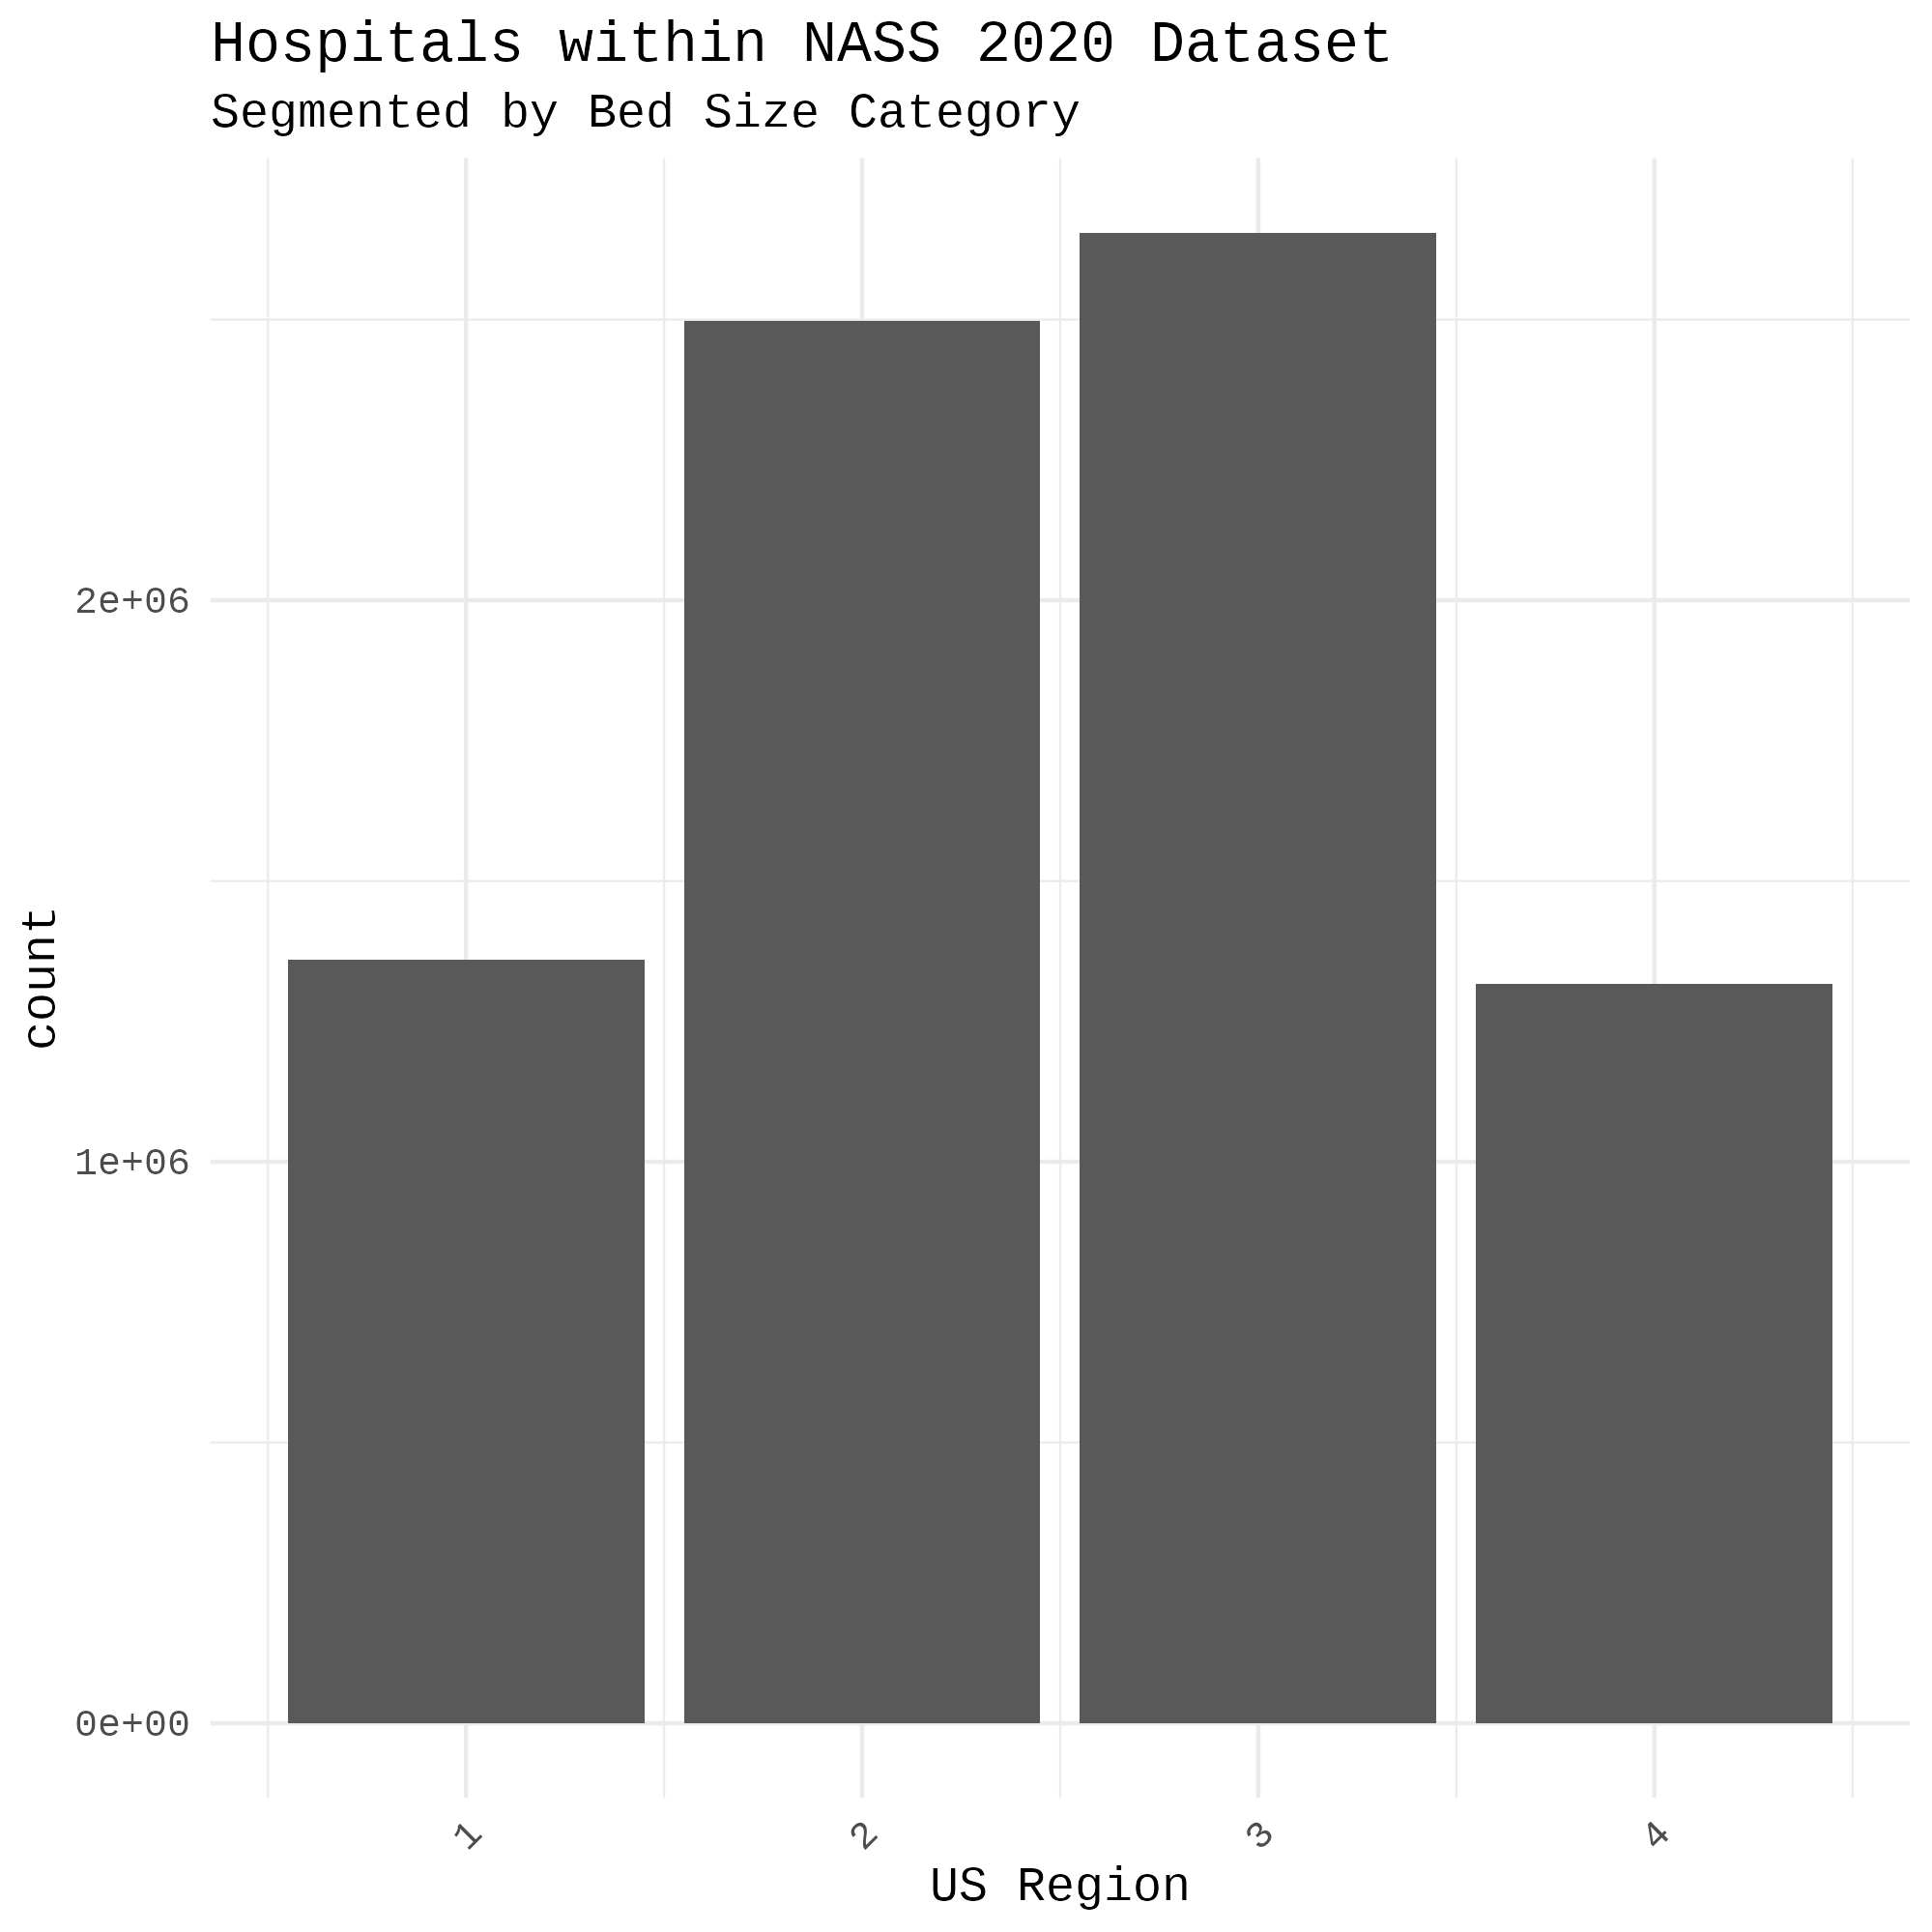

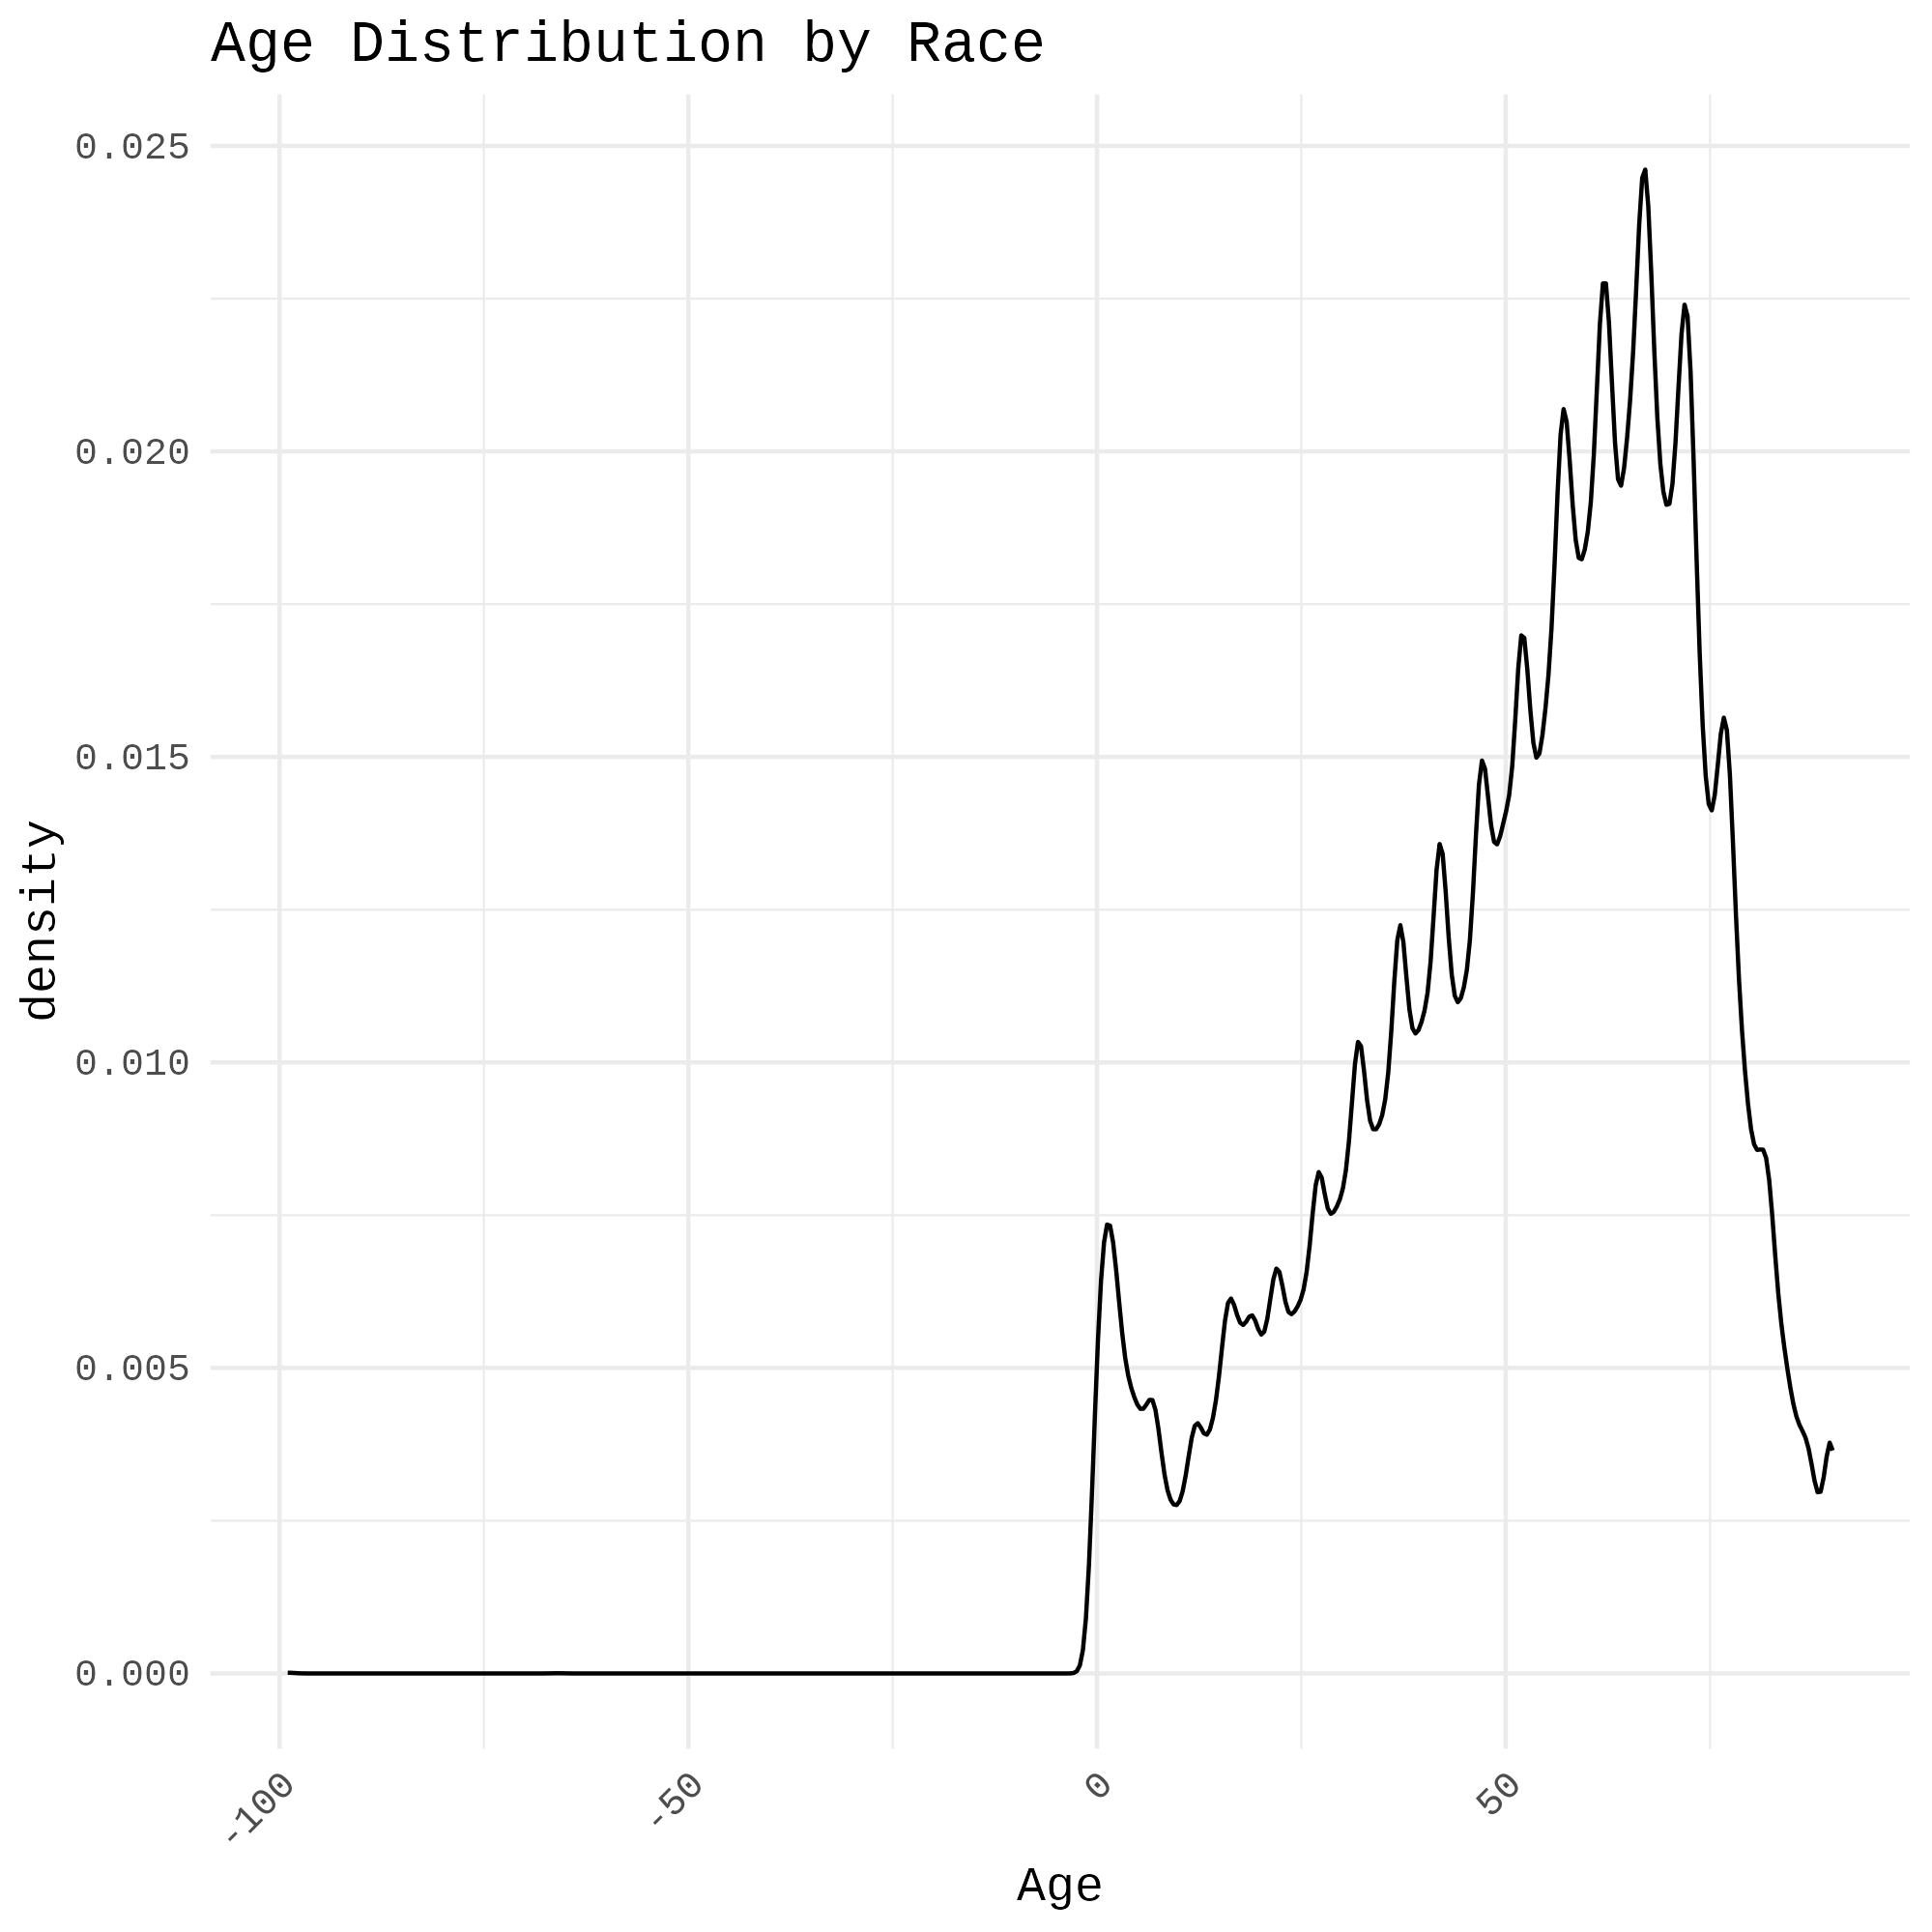

In [9]:
from IPython.display import Image, display

# Display Figure 1
display(Image("/content/Hospitals_by_Region_and_Bed_Size.png"))

# Display Figure 2
display(Image("/content/Age_Distribution_by_Race.png"))

In [ ]:
%%R
### Save Outputs

# Save cleaned data and graphs
fwrite(NASS_2020_all, "/content/NASS_2020_all_cleaned.csv")
print("All outputs saved to Colab environment.")

In [ ]:
%%R
### Poster Space Setup

# Combine all plots into a single PDF for presentation
pdf("/content/NASS_Analysis_Poster.pdf", width = 12, height = 8)

# Add Figure 1
print(fig1)

# Add Figure 2
print(fig2)

# Close the PDF
dev.off()

# Save cleaned data for poster reference
fwrite(NASS_2020_all, "/content/NASS_2020_all_cleaned.csv")
print("Poster PDF and cleaned data saved to Colab environment.")